## Classificação_Detecção_Intrusão

In [2]:
# Ref = https://github.com/hritik7080/Network-Intrusion-Detection/blob/master/Network%20Intrusion%20Detection/kdd4.py

In [3]:
# Ref = https://github.com/TalibKhweled/Network_Intrusion_Detection/blob/main/Network_Intrusion_Detection.ipynb

In [4]:
# Importar Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import warnings

In [5]:
# Gerenciamento de alarmes
warnings.filterwarnings("ignore")

In [6]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [7]:
# Criação de nomes - array - para designar as colunas -- arquivo original possui
colunas = ["duration", "protocol_type", "service", "flag", "src_bytes",
         "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
         "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
         "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
         "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
         "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
         "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
         "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
         "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
         "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

In [8]:
# Leitura_arquivo
data = pd.read_csv(r"kd9.csv", names=colunas, encoding='utf-8',sep= ';')

In [9]:
data.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.


## Descrição dos atributos (colunas)
#duration =	length (number of seconds) of the connection 	continuous
#protocol_type = type of the protocol, e.g. tcp, udp, etc. 	discrete
#service =	network service on the destination, e.g., http, telnet, etc. 	discrete
#src_bytes = number of data bytes from source to destination 	continuous
#dst_bytes = number of data bytes from destination to source 	continuous
#flag =	normal or error status of the connection 	discrete 
#land =	1 if connection is from/to the same host/port; 0 otherwise 	discrete
#wrong_fragment = number of ``wrong'' fragments 	continuous
#urgent =	number of urgent packets 	continuous
#hot =	number of ``hot'' indicators	continuous
#num_failed_logins = number of failed login attempts 	continuous
#logged_in = 1 if successfully logged in; 0 otherwise 	discrete
#num_compromised = number of ``compromised'' conditions 	continuous
#root_shell = 1 if root shell is obtained; 0 otherwise 	discrete
#su_attempted =	1 if ``su root'' command attempted; 0 otherwise 	discrete
#num_root =	number of ``root'' accesses 	continuous
#num_file_creations =	number of file creation operations 	continuous
#num_shells =	number of shell prompts 	continuous
#num_access_files =	number of operations on access control files 	continuous
#num_outbound_cmds = number of outbound commands in an ftp session 	continuous
#is_hot_login =	1 if the login belongs to the ``hot'' list; 0 otherwise 	discrete
#is_guest_login = 1 if the login is a ``guest''login; 0 otherwise 	discrete
#count = number of connections to the same host as the current connection in the past two seconds 	continuous
### Note: The following  features refer to these same-host connections.	
#serror_rate: 	% of connections that have ``SYN'' errors 	continuous
#rerror_rate:	% of connections that have ``REJ'' errors 	continuous
#same_srv_rate: 	% of connections to the same service 	continuous
#diff_srv_rate: 	% of connections to different services 	continuous
#srv_count: 	number of connections to the same service as the current connection in the past two seconds 	continuous
### Note: The following features refer to these same-service connections.	
#srv_serror_rate: 	% of connections that have ``SYN'' errors 	continuous
#srv_rerror_rate:	% of connections that have ``REJ'' errors 	continuous
#srv_diff_host_rate: % of connections to different hosts 	continuous 

In [10]:
# Preparação do dataset
pd.set_option('display.width', 2000)
pd.set_option('display.max_column', 50)
pd.set_option('precision', 3)
data1 = data
# retirada de colunas com dados categóricos
data1 = data1.drop('protocol_type', axis=1)
data1 = data1.drop('service', axis=1)
data1 = data1.drop('flag', axis=1)
data1 = data1.drop('label', axis=1)

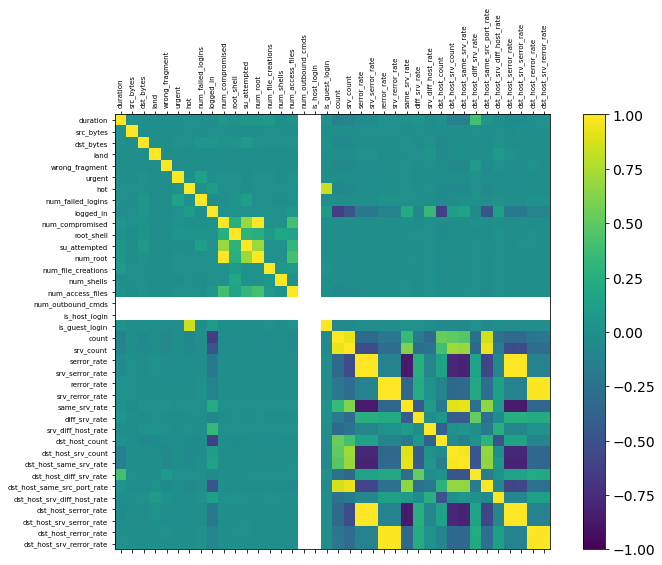

In [11]:
# Análise_Exploratória_A
# uso função pandas corr = matriz de correlação entre variáveis
cor = data1.corr()
fig = plt.figure()
subFig = fig.add_subplot(111)

cax = subFig.matshow(cor, vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = np.arange(0, len(data1.columns))
subFig.set_xticks(ticks)
subFig.set_yticks(ticks)
subFig.set_xticklabels(data1.columns, rotation='vertical', size=7)
subFig.set_yticklabels(data1.columns, size=7)

plt.show()

In [12]:
# eliminação de colunas_desnecessárias
data = data.drop(columns=['is_host_login','num_outbound_cmds'])

In [13]:
# confirmação_colunas_dataset
data.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.


### Análise Exploratória Inicial

In [14]:
# avaliação dos ataques - indicados pelo 'label'
dataDN=data.iloc[:,-1]

In [15]:
dataDN=pd.DataFrame(dataDN)

In [16]:
# reconheciento dos 'labels'
dataDN.head(2)

,label
0,normal.
1,normal.


In [17]:
# geração do nome das colunas para atributos
dataND=data.drop(columns='label')

In [18]:
dataND.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0


In [19]:
# Análise_Exploratória_B
# Retirada de atributos correlatos -- threshold acima de 70% ou abaixo de -70%. Dados entre limites permaneceram
x = list(cor.columns)
g = []

for i in x:
    for j in x[:x.index(i)]:
        if abs(cor[i][j]) >= 0.7:
            g.append((i, j))
o, c = [], 0
for i in g:
    for v in o:
        if i[0] in [x for x in v] or i[1] in [x for x in v]:
            c += 1
    if c == 0:
        s = {i[0], i[1]}
        for j in g[g.index(i) + 1:]:
            if i[0] == j[0] or i[0] == j[1] or i[1] == j[0] or i[1] == j[1]:
                s.add(j[0])
                s.add(j[1])

        o.append(s)
    c = 0
b = []
listd = set(b)
for i in o:
    for j in list(i)[:-1]:
        listd.add(j)        # listd = lista das colunas correlacionadas

for i in listd:
    data = data.drop(i, axis=1)     # retirada das colunas correlacionadas

In [20]:
# ETL_conversão_dados_categóricos em numéricos
# Uso do labelEncoder
dataX = data.values[:, :data.shape[1] - 1]   #dados_entrada
dataY = data.values[:, data.shape[1] - 1] #dados_saída
dataY1 = dataY
dataX[:, 1] = LabelEncoder().fit_transform(dataX[:, 1])
dataX[:, 2] = LabelEncoder().fit_transform(dataX[:, 2])
dataX[:, 3] = LabelEncoder().fit_transform(dataX[:, 3])
dataY = LabelEncoder().fit_transform(dataY)

In [21]:
dataDN.describe()

,label
count,494021
unique,23
top,smurf.
freq,280790


In [22]:
# correlação entre o tipo de ataque e label_encoded
le = LabelEncoder()
labelYD = dataDN[['label']].copy() #Create an extra dataframe which will be used to address only the encoded values
labelYD['label_encoded'] = le.fit_transform(dataDN['label'].values) #Using values is faster than using list
print(labelYD)

          label  label_encoded
0       normal.             11
1       normal.             11
2       normal.             11
3       normal.             11
4       normal.             11
...         ...            ...
494016  normal.             11
494017  normal.             11
494018  normal.             11
494019  normal.             11
494020  normal.             11

[494021 rows x 2 columns]


In [23]:
labelYD.describe()
# há mais de um tipo de ataque

,label_encoded
count,494021.000
mean,14.546
std,4.161
min,0.000
25%,11.000
50%,18.000
75%,18.000
max,22.000


### Códigos do LabelEncoder_Ataques

In [24]:
labelYD.loc[116470,:]
# neptune = ataque do tipo DoS

label            neptune.
label_encoded           9
Name: 116470, dtype: object

In [25]:
labelYD.loc[1,:]
# normal = não é um ataque, acesso simples.

label            normal.
label_encoded         11
Name: 1, dtype: object

In [26]:
labelYD.loc[52476,:]
# ipsweep = ataque to tipo 'probe'

label            ipsweep.
label_encoded           5
Name: 52476, dtype: object

In [27]:
labelYD.loc[159985,:]
# smurf = ataque do tipo DoS

label            smurf.
label_encoded        18
Name: 159985, dtype: object

In [28]:
labelYD.loc[140789,:]
# satan = ataque do tipo 'probe'

label            satan.
label_encoded        17
Name: 140789, dtype: object

In [29]:
labelYD.loc[140500,:]
# warezclient = ataque do tipo 'remote local atack'

label            warezclient.
label_encoded              21
Name: 140500, dtype: object

In [30]:
labelYD.loc[140388,:]
# spy = ataque do tipo 'remote local atack'

label            spy.
label_encoded      19
Name: 140388, dtype: object

In [31]:
labelYD.loc[136619,:]
# back = ataque do tipo 'remote local atack'

label            back.
label_encoded        0
Name: 136619, dtype: object

### Distribuição dos ataques

array([[<AxesSubplot:title={'center':'label_encoded'}>]], dtype=object)

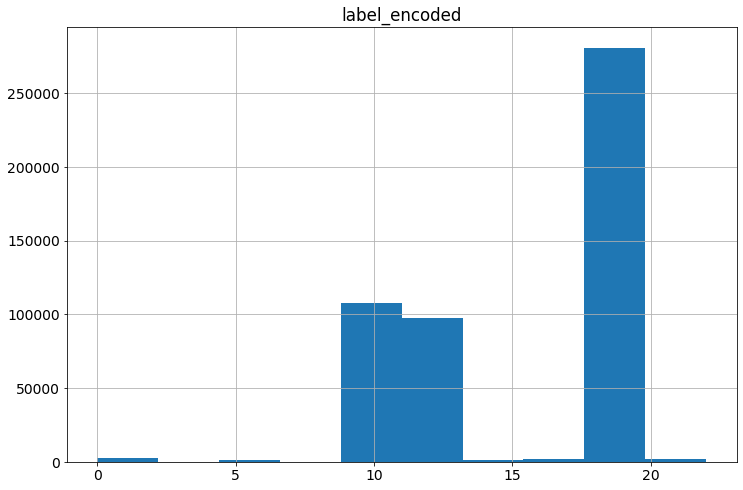

In [32]:
labelYD.hist()

In [33]:
# ETL_preservação_labels
label = {}
# Storig the label in a dictionary of label as key and value as encoded form of that label.
for i in range(len(dataY1)):
    label[dataY[i]] = dataY1[i]

### Algoritmos de ML

SVC: Acurácia_LinearSVC :  58.17
SVC: Acurácia_SVC_kfold10 :  81.04
Perceptron: Acurácia_Perceptron :  67.7
Perceptron: Acurácia_Perceptron_k-fold10 :  24.91
KNN: Acurácia_KNN :  99.86
KNN: Acurácia_KNN_kfold10 :  99.81
SGDC: Acurácia_Stochastic Gradient Descent :  72.01
SGDC: Acurácia_SGDC_kfold10 :  34.99
XGBoost: Acurácia_XGBoost :  19.71
XGBoost: Acurácia_XGBoost_kfold10 :  99.94


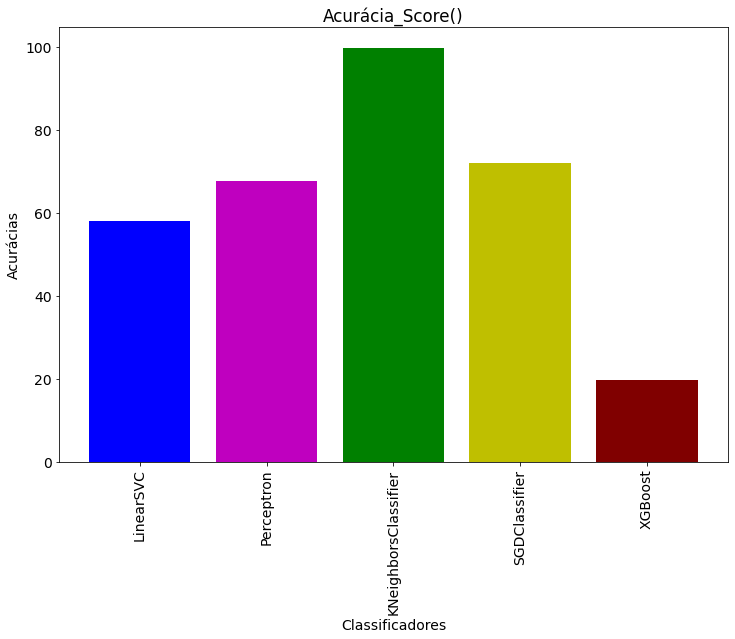

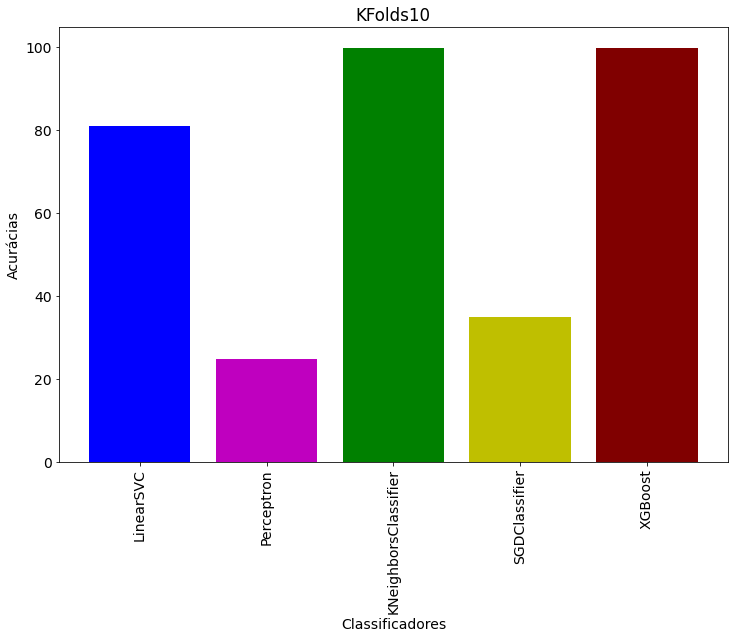

In [34]:
# Função_Classificação_ML_acurácia
def acr(x, y):
    l = []
    k = []
    # divisão treino_teste_threshold 1/4
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=7)
    # normalização de dados
    fit = Normalizer().fit(x_train)
    x_train = fit.fit_transform(x_train)

    # MODEL_Linear SVC
    linear_svc = LinearSVC()
    linear_svc.fit(x_train, y_train)
    y_pred = linear_svc.predict(x_val)
    acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
    print("SVC: Acurácia_LinearSVC : ", acc_linear_svc)
    l.append(acc_linear_svc)
    #k_fold = 10
    acc_linear_svck = cross_val_score(linear_svc, x_val, y_val, cv=10, scoring='accuracy')
    print("SVC: Acurácia_SVC_kfold10 : ", round(acc_linear_svck.mean() *100, 2))
    k.append(round(acc_linear_svck.mean() *100, 2))

    # MODEL_Perceptron
    perceptron = Perceptron()
    perceptron.fit(x_train, y_train)
    y_pred = perceptron.predict(x_val)
    acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
    print("Perceptron: Acurácia_Perceptron : ", acc_perceptron)
    l.append(acc_perceptron)
    acc_perceptronk = cross_val_score(perceptron, x_val, y_val, cv=10, scoring='accuracy')
    print("Perceptron: Acurácia_Perceptron_k-fold10 : ", round(acc_perceptronk.mean() * 100, 2))
    k.append(round(acc_perceptronk.mean() * 100, 2))
   
    # MODEL_KNN
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_val)
    acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
    print("KNN: Acurácia_KNN : ", acc_knn)
    l.append(acc_knn)
    acc_knnk = cross_val_score(knn, x_val, y_val, cv=10, scoring='accuracy')
    print("KNN: Acurácia_KNN_kfold10 : ", round(acc_knnk.mean() * 100, 2))
    k.append(round(acc_knnk.mean() * 100, 2))

    # MODEL_Stochastic Gradient Descent
    sgd = SGDClassifier()
    sgd.fit(x_train, y_train)
    y_pred = sgd.predict(x_val)
    acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
    print("SGDC: Acurácia_Stochastic Gradient Descent : ", acc_sgd)
    l.append(acc_sgd)
    acc_sgdk = cross_val_score(sgd, x_val, y_val, cv=10, scoring='accuracy')
    print("SGDC: Acurácia_SGDC_kfold10 : ", round(acc_sgdk.mean() * 100, 2))
    k.append(round(acc_sgdk.mean() * 100, 2))
   
    # MODEL_XGBoost
    classifier = XGBClassifier()
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_val)
    acc_xgb=round(accuracy_score(y_pred, y_val) * 100, 2)
    print("XGBoost: Acurácia_XGBoost : ", acc_xgb)
    l.append(acc_xgb)
    acc_xgbk = cross_val_score(classifier, x_val, y_val, cv=10, scoring='accuracy')
    print("XGBoost: Acurácia_XGBoost_kfold10 : ", round(acc_xgbk.mean() * 100, 2))
    k.append(round(acc_xgbk.mean() * 100, 2))

    classifiers=['LinearSVC', 'Perceptron','KNeighborsClassifier','SGDClassifier','XGBoost']
    plt.bar(classifiers, l, color=['b','m','g','y','maroon','cyan'])
    plt.xticks(classifiers, rotation='vertical')
    plt.xlabel('Classificadores')
    plt.ylabel('Acurácias')
    plt.title("Acurácia_Score()")
    plt.show()
    l = []
    plt.bar(classifiers, k, color=['b', 'm', 'g', 'y', 'maroon', 'cyan'])
    plt.xticks(classifiers, rotation='vertical')
    plt.xlabel('Classificadores')
    plt.ylabel('Acurácias')
    plt.title("KFolds10")
    plt.show()
    k=[]

acr(dataX,dataY)

### Avaliação da importância dos atributos

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
x_train, x_val, y_train, y_val = train_test_split(dataX, dataY, test_size=0.25, random_state=7)

In [59]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [38]:
rf.feature_importances_

array([2.41400179e-03, 8.79345227e-01, 6.16210825e-04, 2.73039490e-03,
       3.42008729e-02, 9.15272886e-04, 2.49964879e-06, 8.47916645e-03,
       1.54103702e-05, 2.90668187e-05, 9.46928597e-04, 2.46487575e-02,
       5.69383724e-06, 3.29064679e-05, 1.05022845e-05, 1.94868979e-05,
       1.58261142e-03, 2.45276938e-02, 1.43695388e-05, 9.08662285e-04,
       1.72999472e-02, 9.13463369e-04, 2.44435209e-04, 9.64182383e-05])

Text(0.5, 0, 'Importância_parâmetros_Random_Forest')

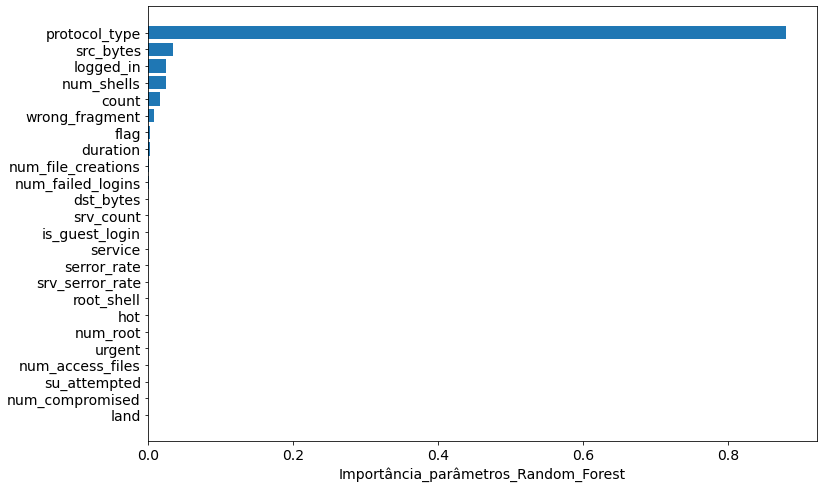

In [39]:
sorted_idx = rf.feature_importances_.argsort()
feature_names=dataX
plt.barh(dataND.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Importância_parâmetros_Random_Forest")

## Detecção de Intrusão_Redes Neurais

In [ ]:
! pip install wandb

In [ ]:
# Importação de bibliotecas
import seaborn as sns
from IPython.display import Image
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import f1_score, recall_score, precision_score, roc_curve, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adadelta,Adam,RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import wandb
from wandb.keras import WandbCallback

%matplotlib inline 

In [ ]:
# Função_atribuição de número à classificação
def custom_encoder(label):
    if label in ['normal.']:
        return 0
    else:
        return 1

In [ ]:
# Alteração de categórico para numérico
data['label'] = data['label'].apply(custom_encoder)
# remoção de redundantes
data = data.drop_duplicates()

In [ ]:
# análise exploratória_RNN
print(data.info())
print("\nNumber of NaN values:", data.isnull().sum().sum())

In [ ]:
numeric_cols = [i for i in data.columns if i not in ['protocol_type','service', 'flag', 'land', 'logged_in',
                                                   'is_guest_login', 'label']]
categorical_cols_to_encode = ['protocol_type','service', 'flag']
# Definição de escala
mms = MinMaxScaler()
# categorias_escalas_numéricas
data[numeric_cols] = mms.fit_transform(data[numeric_cols])
# Encode_categóricos
data = pd.get_dummies(data, columns=categorical_cols_to_encode)

In [ ]:
# Confirmação_depois_scaling
data.isnull().any().sum()

In [ ]:
# Preparação arquivos
X_cols = [i for i in data.columns if i is not 'label']
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data['label'], test_size=0.25, random_state=42)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

### Modelo_Rede_Neural

In [ ]:
# acompanhamento de hiperparâmetros e métricas
# requer acesso API ao site do wandb
run = wandb.init(project="5734", entity="65-1157")

In [ ]:
wandb.config = {"learning_rate": 0.001,"epochs": 5,"batch_size":36}

In [ ]:
batch_size=36
epochs=5

In [ ]:
# Arquitetura do Modelo
model = Sequential()

model.add(Dense(102, input_shape=(102,)))
model.add(Activation('relu'))

model.add(Dense(87, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='SGD')

print (model.summary())

In [ ]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=20, verbose=2, mode='auto')

checkpointer = ModelCheckpoint(filepath="model-best.h5", verbose=1, save_best_only=True)

model.fit(X_train, y_train, batch_size=batch_size,
          validation_data=(X_test, y_test),
          #callbacks=[WandbCallback(), monitor, checkpointer],
          epochs=epochs, verbose=2)

# Recarga dos melhores pesos
model.load_weights('model-best.h5')

# Parar a ferramenta de monitoração
run.finish()

In [ ]:
model.load_weights('model-best.h5')

# Predição
validation_preds = model.predict(X_test)
validation_preds = np.round(validation_preds)

# Métricas
precision = precision_score(y_test, validation_preds, average='weighted')
recall = recall_score(y_test, validation_preds, average='weighted')
score = f1_score(y_test, validation_preds, average='weighted')

print("Precisão_valores: {}".format(precision))
print("Recall_valores: {}".format(recall))
print("F1_valores: {}".format(score))

## Matriz de Confusão

In [ ]:
cfm = confusion_matrix(validation_preds, y_test)
plt.figure(figsize=(15,7))
sns.heatmap(cfm,cmap=sns.color_palette("flare", as_cmap=True), annot=True,fmt='',
            xticklabels=['conexão_benéfica', 'ataque'], yticklabels=['conexão_benéfica', 'ataque'])

## CNN_Keras

In [ ]:
pip install keras upgrade

In [ ]:
y_train_cnn = tf.keras.utils.to_categorical(y_train, 2)
y_test_cnn = tf.keras.utils.to_categorical(y_test, 2)

X_train_cnn = X_train.to_numpy().reshape((X_train.shape[0],1,X_train.shape[1],1))
X_test_cnn = X_test.to_numpy().reshape((X_test.shape[0],1,X_test.shape[1],1))

In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(64, kernel_size=(1,7), strides=(1,1), activation='relu', input_shape=(1, 102, 1)))

cnn_model.add(MaxPooling2D(pool_size=(1,2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(1000, activation='relu'))

# cnn_model.add(Dense(750, activation='relu'))

cnn_model.add(Dropout(0.5))

# cnn_model.add(Dense(500, activation='relu'))

# cnn_model.add(Dense(200, activation='relu'))

# cnn_model.add(Dropout(0.2))

cnn_model.add(Dense(10, activation='relu'))

cnn_model.add(Dropout(0.2))

cnn_model.add(Dense(2, activation='softmax'))

cnn_model.compile(loss='categorical_crossentropy', optimizer='SGD')

print (cnn_model.summary())

In [ ]:
X_test.shape

In [ ]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=20, verbose=2, mode='auto')

checkpointer = ModelCheckpoint(filepath="model-best.h5", verbose=2, save_best_only=True)

cnn_model.fit(X_train_cnn, y_train_cnn,
          validation_data=(X_test_cnn, y_test_cnn),
          # callbacks=[WandbCallback(), monitor, checkpointer],
          epochs=epochs, verbose=2)
model.save_weights('model-best_weights.h5')
model.save('model-best.h5')

# Recarga dos melhores pesos para avaliação
cnn_model.load_weights('model-best.h5')

# Parar a ferramenta de acompanhamento
run.finish()

In [ ]:
cnn_model.load_weights('model-best.h5')

# Predição
validation_preds = cnn_model.predict(X_test_cnn)
validation_preds = np.round(validation_preds)

# Métricas
precision = precision_score(y_test_cnn, validation_preds, average='weighted')
recall = recall_score(y_test_cnn, validation_preds, average='weighted')
score = f1_score(y_test_cnn, validation_preds, average='weighted')

print("Precisão_valores: {}".format(precision))
print("Recall_valores: {}".format(recall))
print("F1_valores: {}".format(score))

## Matriz de Confusão

In [ ]:
cfm = confusion_matrix(validation_preds.argmax(axis=1), y_test_cnn.argmax(axis=1))
plt.figure(figsize=(15,7))
sns.heatmap(cfm,cmap=sns.color_palette("crest", as_cmap=True), annot=True,fmt='',
            xticklabels=['conexão_benéfica', 'ataque'], yticklabels=['conexão_benéfica', 'ataque'])